# CS5481 - Tutorial 4
## Data Visualization

Welcome to CS5481 Data Visualization Tutorial 4. In this session, we'll explore how to leverage the Python library `matplotlib`, along with other supportive libraries (e.g., `panda`, `seaborn`), to create compelling and informative visual representations of data. 

Understanding these visualizations is crucial for data analysis, allowing us to identify trends, patterns, and outliers effectively.

This tutorial is designed to provide a practical approach to data visualization, ensuring you gain hands-on experience with the tools and techniques commonly used in the industry today.

## Preparation and Environment Setup

Before we dive into the practical exercises, please ensure your environment is set up with the necessary software and libraries. 

Here's what you'll need:

- Python

- Python Libraries

  - matplotlib

  - seaborn
  
  - pandas
  
  - numpy

If you haven't installed these libraries yet, you can install them using pip:

In [1]:
! pip install matplotlib
! pip install seaborn

## 1. Import Libraries

In [2]:
# Import essential libraries for data manipulation and mathematical operations
import numpy as np  # Provides support for large, multi-dimensional arrays and matrices

import pandas as pd  # Offers data structures and operations for manipulating numerical tables and time series

# Import libraries for data visualization
import matplotlib as mpl  # Base library providing the foundation for plotting and visualization

import matplotlib.pyplot as plt  # Provides a MATLAB-like plotting framework

import seaborn as sns  # Based on matplotlib, provides a high-level interface for drawing attractive statistical graphics

### Customizing Plot Aesthetics
Before we dive into the actual plotting, it's essential to set up the visual style and scaling of our figures. This ensures that all our plots not only convey the right information but are also visually appealing and easy to interpret. 

We could configure some key aspects of our plots, such as font sizes and figure dimensions, using Matplotlib's `rcParams`. In addition, we set a clean, grid-based style using Seaborn.


In [4]:
# Set font sizes for different elements of the plots
large = 22; med = 16; small = 12  # Define size variables for easy adjustments

# Create a dictionary to hold your custom matplotlib settings
params = {
    'axes.titlesize': large,  # Font size of the axes title
    'legend.fontsize': med,   # Font size of the legend
    'figure.figsize': (16, 10),  # Size of the figure in inches (width, height)
    'axes.labelsize': med,  # Font size of the x and y labels
    'xtick.labelsize': med,  # Font size of the tick labels on the x-axis
    'ytick.labelsize': med,  # Font size of the tick labels on the y-axis
    'figure.titlesize': large  # Font size of the figure title
}

# Update the default rc (runtime configuration) settings with your custom parameters
plt.rcParams.update(params)

print(plt.style.available)  # Display the available styles for matplotlib plots

# Set the style of the matplotlib figures to 'seaborn-whitegrid' for a clean look with grid lines
plt.style.use("seaborn-v0_8-whitegrid")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Types of Data Visualizations

In this tutorial, we will explore five main types of visualizations, each suited for analyzing different aspects of data:

- **Correlation:** Identifies the relationship between two or more variables.

- **Deviation:** Shows variations from a standard or reference point.

- **Ranking:** Displays the order or rank of data points within a dataset.

- **Distribution:** Illustrates how data points are spread across the dataset.

- **Composition:** Demonstrates how different parts contribute to a whole.

We'll cover each type in detail in the following sections, highlighting their uses and best practices.

## 2. 1 Correlation

### 2.1.1 Scatter Plot
A scatter plot is a fundamental visualization for examining the relationship between two variables. It plots pairs of numerical data, with one variable on each axis, to look for patterns and see whether the variables are related. 

If your data contains multiple groups, such as categories or clusters, using different colors for each group can help distinguish them and highlight unique trends or outliers within these groups. 

This technique is particularly useful in exploratory data analysis, where visual cues can prompt further investigation into causal relationships or correlations.


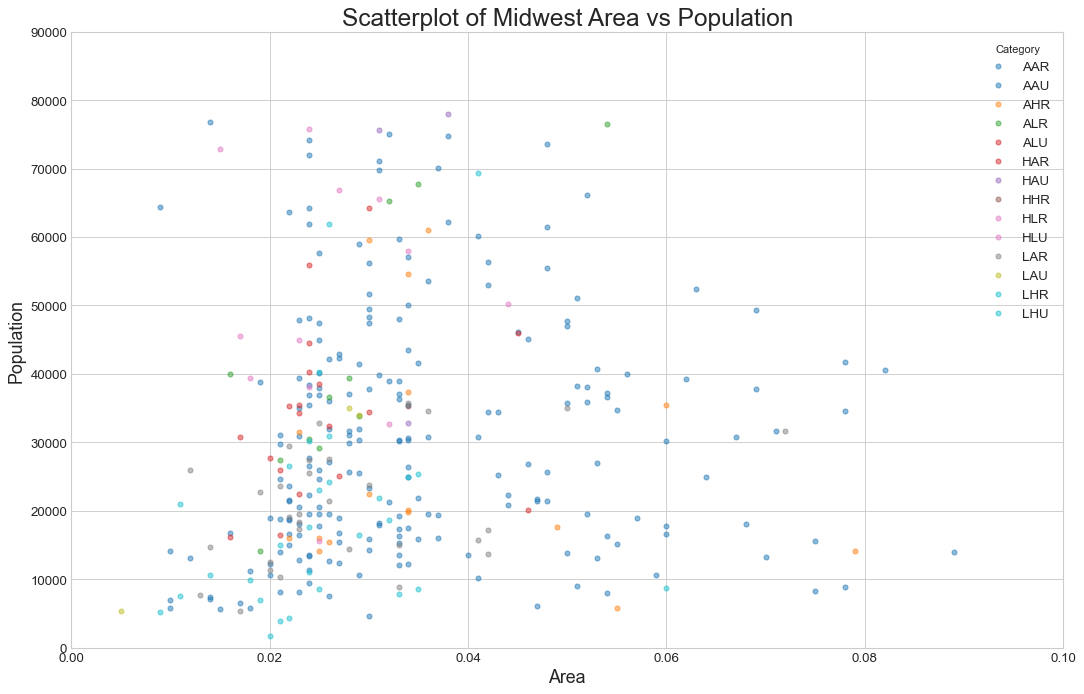

In [5]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating visualizations

# Import dataset from a publicly available URL
midwest = pd.read_csv("https://github.com/selva86/datasets/raw/master/midwest_filter.csv")

# Prepare Data
# Extract unique categories from the 'category' column of the dataset
categories = np.unique(midwest['category'])

# Create a color palette with one color for each category
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Set up the figure for plotting
plt.figure(figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')

# Draw a scatter plot for each category
for i, category in enumerate(categories):
    # Select data that matches the current category
    subset = midwest[midwest.category == category]
    # Plot 'area' vs 'poptotal' for the subset with a unique color and label
    plt.scatter('area', 'poptotal',
                data=subset,
                s=20,  # Size of the scatter mark
                c=[colors[i]],  # Color of the points
                label=str(category),  # Label for the legend
                alpha=0.5)  # Transparency of the points

# Decorations
# Set x and y limits, labels, and font size of ticks
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the title of the plot and the font size
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)

# Display a legend with a title, adjust font size
plt.legend(title="Category", fontsize=12)

# Display the plot
plt.show()

### 2.1.2 Correlogram

A correlogram is a visual tool in data analysis that is used to show the correlation coefficients between multiple variables at once. Each cell in the correlogram represents the correlation between two variables, often visualized through color coding. 

This type of plot is highly effective for quickly identifying relationships within a dataset, making it easier to pinpoint which pairs of variables have strong positive or negative correlations.

Next, we will learn how to create a correlogram using seaborn's heatmap functionality, which makes it straightforward to generate these comprehensive views of data relationships.

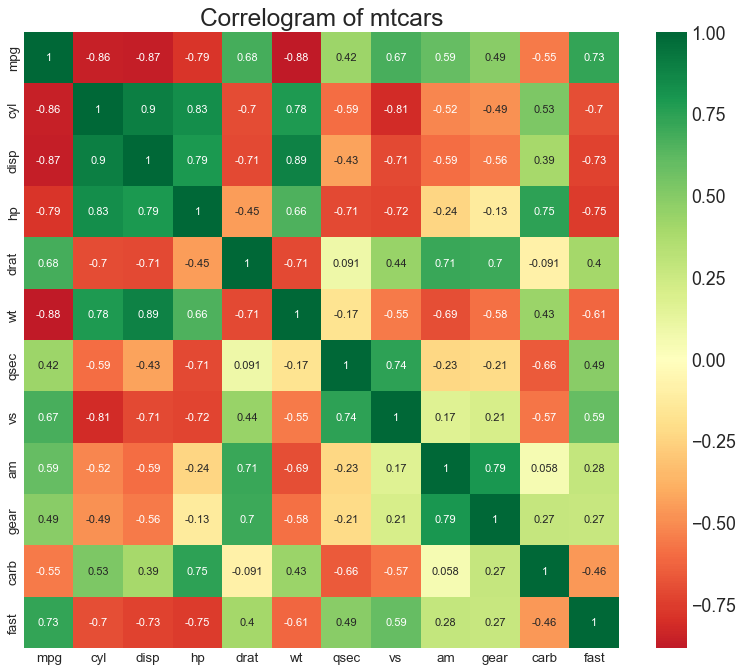

In [6]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For high-level interface for drawing attractive statistical graphics

# Import dataset from a public URL
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# Remove non-numeric columns to prepare for correlation matrix calculation
df_numeric = df.select_dtypes(include=[np.number])

# Plot setup
plt.figure(figsize=(12, 10), dpi=80)  # Set the size and resolution of the plot

# Create a heatmap of the correlation matrix
sns.heatmap(df_numeric.corr(),  # Data source: DataFrame correlation matrix
            xticklabels=df_numeric.corr().columns,  # X-axis labels as column names from the correlation matrix
            yticklabels=df_numeric.corr().columns,  # Y-axis labels as column names
            cmap='RdYlGn',  # Color map: Red to Yellow to Green, indicates strength of correlation
            center=0,  # Center the colormap at 0, divergence at zero to show +ve and -ve equally
            annot=True)  # Annotate cells with correlation coefficients

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)  # Set the title and its size
plt.xticks(fontsize=12)  # Set the font size of the x-axis labels
plt.yticks(fontsize=12)  # Set the font size of the y-axis labels
plt.show()  # Display the plot


## 2.2 Deviation

### 2.2.1 Diverging Bars

Diverging bars are an excellent visualization technique for showcasing variations across categories based on a single metric. By displaying data as bars that diverge from a common midpoint, this visualization makes it easy to compare the magnitude and direction of differences.

In the next section, we'll go through how to create a diverging bar chart using Python's matplotlib library, helping to visually communicate the differences in performance across various groups effectively.

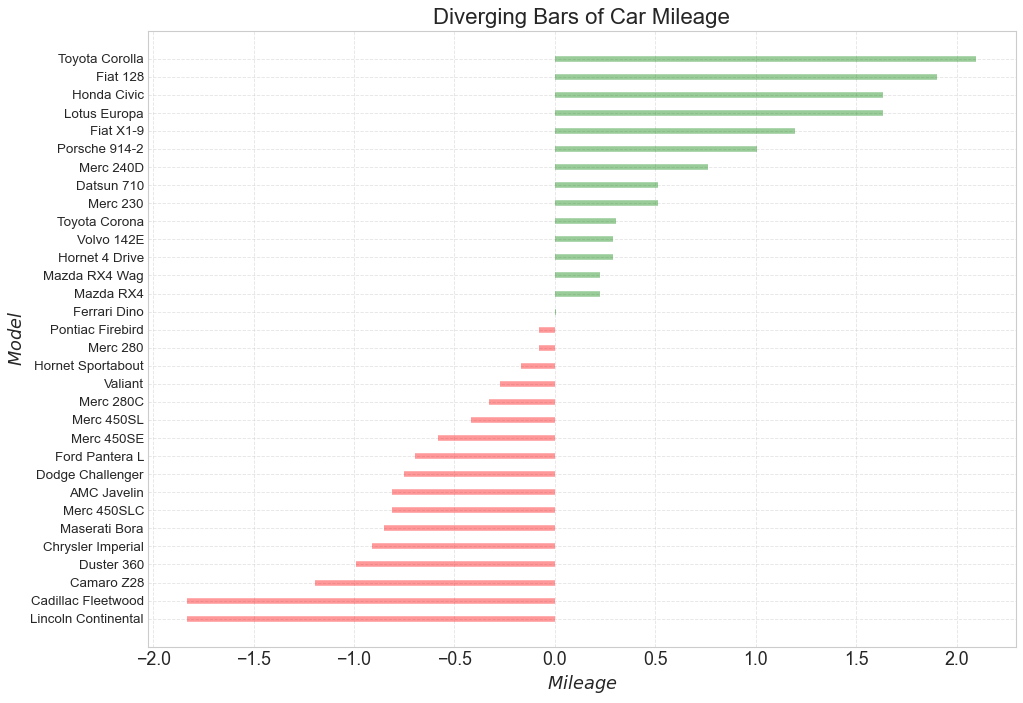

In [7]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating visualizations

# Import dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# Prepare data
x = df.loc[:, ['mpg']]  # Select the 'mpg' column to calculate Z-scores
df['mpg_z'] = (x - x.mean()) / x.std()  # Compute Z-scores of 'mpg' to standardize

# Assign colors based on the value of 'mpg_z'
df['colors'] = ['red' if value < 0 else 'green' for value in df['mpg_z']]

# Sort the DataFrame by 'mpg_z' to ensure the bars diverge around the zero point
df.sort_values('mpg_z', inplace=True)

# Reset index to order by sorted values for more coherent plotting
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14, 10), dpi=80)  # Set size and resolution of the figure
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)  # Draw horizontal lines

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')  # Set labels for axes
plt.yticks(df.index, df.cars, fontsize=12)  # Set y-ticks to car models
plt.title('Diverging Bars of Car Mileage', fontdict={'size': 20})  # Title of the plot
plt.grid(linestyle='--', alpha=0.5)  # Add gridlines with custom style and transparency

# Show the plot
plt.show()

### 2.2.2 Diverging Texts

Diverging Texts are a variant of Diverging Bars, offering a direct visual representation of data values alongside the graphical depiction. This approach is particularly useful when precise values are as important as visual trends. 

By placing text labels directly on the plot, this format allows for a quick assessment of each item's exact metric while still highlighting the comparison between them in a visually intuitive manner. 

Next, we'll learn how to implement Diverging Texts to enhance the readability and detail of our visualizations.

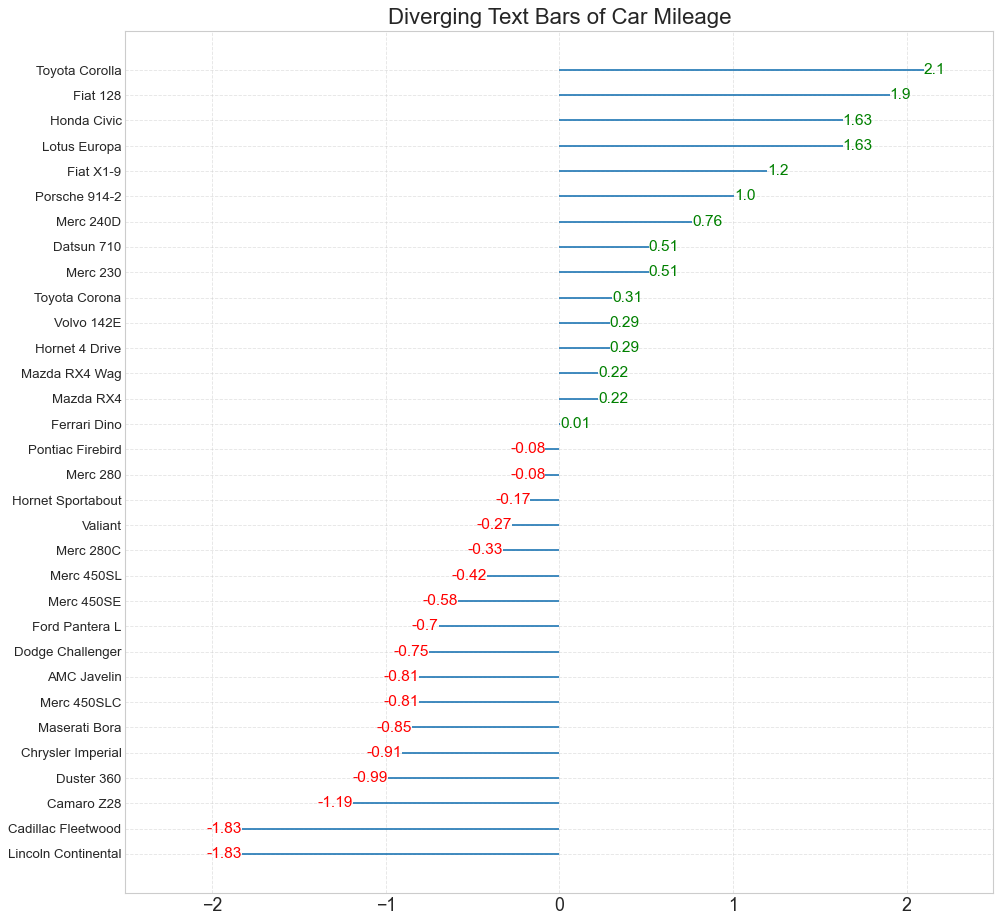

In [8]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating visualizations

# Import dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# Prepare data
x = df.loc[:, ['mpg']]  # Select the 'mpg' column to calculate Z-scores
df['mpg_z'] = (x - x.mean()) / x.std()  # Compute Z-scores of 'mpg' to standardize

# Assign colors based on the value of 'mpg_z'
df['colors'] = ['red' if value < 0 else 'green' for value in df['mpg_z']]

# Sort the DataFrame by 'mpg_z' to ensure the texts diverge around the zero point
df.sort_values('mpg_z', inplace=True)

# Reset index to order by sorted values for more coherent plotting
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14, 14), dpi=80)  # Set size and resolution of the figure
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)  # Draw horizontal lines

# Plot texts on the diverging bars
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    # Position text at the end of the bar segment
    plt.text(x, y, round(tex, 2), 
             horizontalalignment='right' if x < 0 else 'left',
             verticalalignment='center', 
             fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations
plt.yticks(df.index, df.cars, fontsize=12)  # Set y-ticks to car models
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})  # Title of the plot
plt.grid(linestyle='--', alpha=0.5)  # Add gridlines with custom style and transparency
plt.xlim(-2.5, 2.5)  # Set limits for x-axis to standardize display across datasets
plt.show()  # Display the plot

### 2.2.3 Area Chart

Area charts are a compelling way to visualize data by coloring the area between the axes and lines. This type of chart emphasizes not only the peaks and valleys but also the duration of highs and lows. 

By illustrating the magnitude of fluctuations over time, area charts allow viewers to quickly grasp the relative significance of different periods in the dataset. The larger the area under a peak, the longer and more significant that high point is. 

Next, we'll create an area chart to visualize how certain values have changed over time, highlighting their impact through the use of color and area.

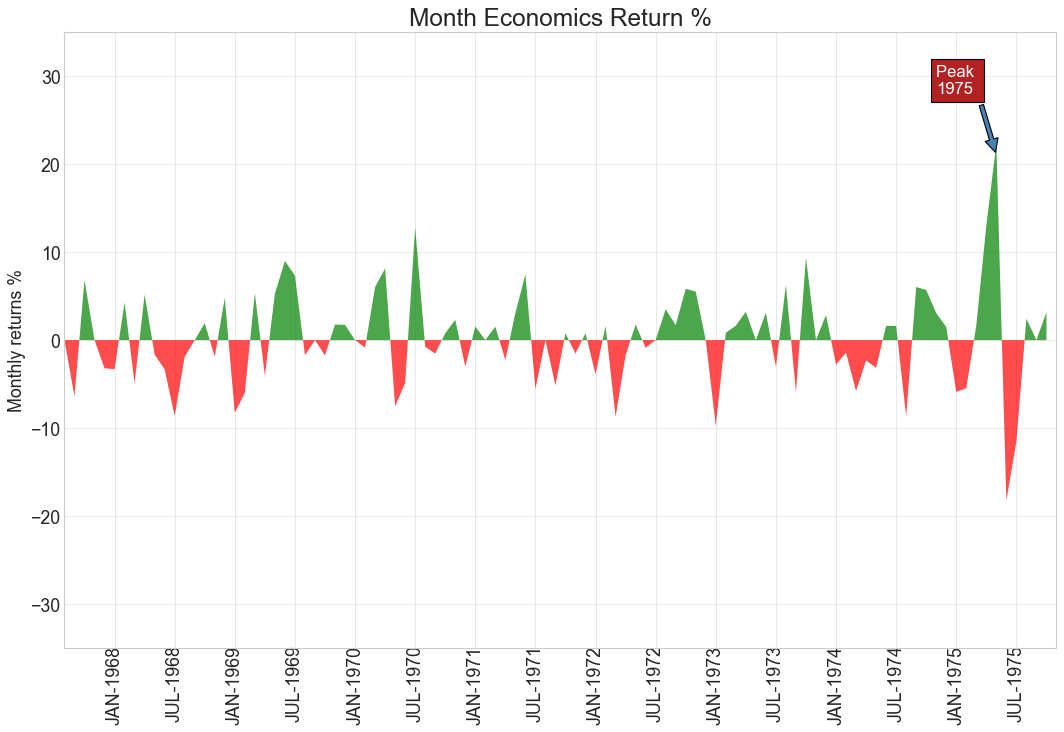

In [9]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating visualizations

# Prepare Data
# Load data and parse dates in the 'date' column
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)
# Create an array of indices for x-axis
x = np.arange(df.shape[0])
# Calculate monthly returns as a percentage
y_returns = (df.psavert.diff().fillna(0) / df.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(16, 10), dpi=80)  # Set the size and resolution of the plot
# Fill area for positive returns
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
# Fill area for negative returns
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
# Highlight a specific point with an annotation
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')

# Decorations
# Create custom x-tick labels combining the month and year
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y, m in zip(df.date.dt.year, df.date.dt.month_name())]

# Set custom x-ticks at regular intervals
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35, 35)  # Set y-axis limits
plt.xlim(1, 100)  # Set x-axis limits
plt.title("Month Economics Return %", fontsize=22)  # Title of the plot
plt.ylabel('Monthly returns %')  # y-axis label
plt.grid(alpha=0.5)  # Set grid transparency

plt.show()  # Display the plot

## 2.3 Ranking

### 2.3.1 Lollipop Chart

A Lollipop Chart is a visual tool that combines elements of both the scatter plot and the bar chart to highlight the rank order of items, which shows the differences in magnitude among categories by representing each data point with a 'lollipop'—a line that extends from a baseline to a circle marker. 

This distinctive style not only draws attention to each item’s value but also makes the differences between ranks visually striking. Lollipop Charts are particularly useful for displaying metrics where the rank order is more important than the exact values. 

In the next example, we will create a Lollipop Chart to illustrate the performance of various categories in a clear and engaging way.


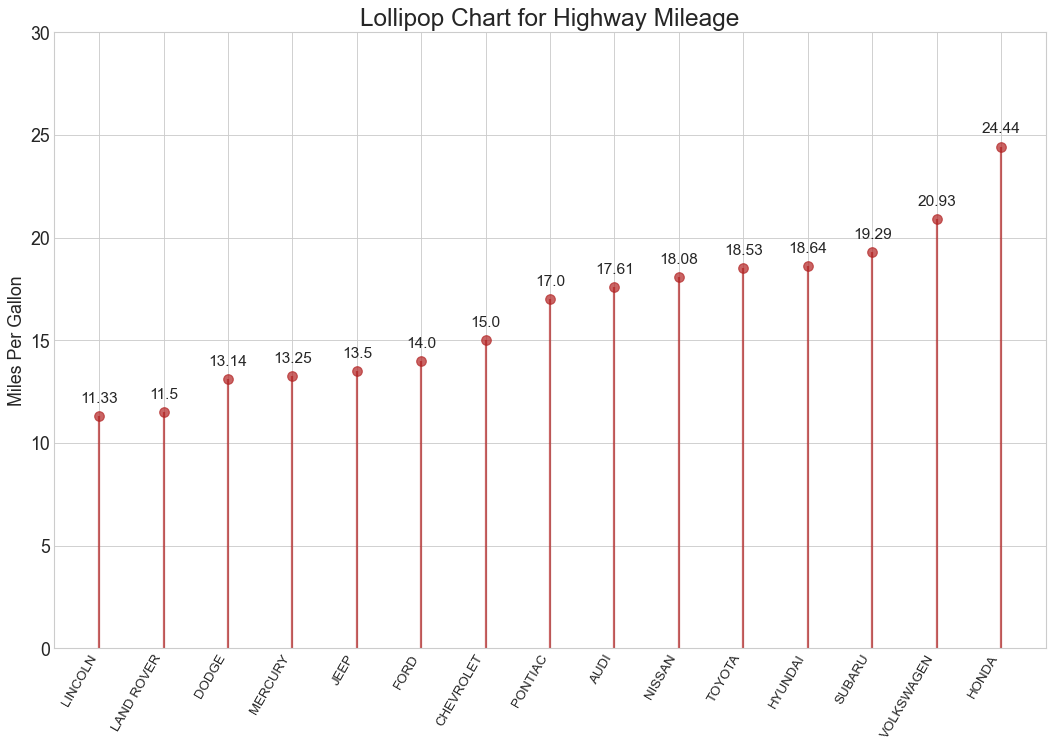

In [10]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating visualizations

# Prepare Data
# Load data from a public URL and select relevant columns
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
# Group data by 'manufacturer' and calculate the average 'cty' mileage
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
# Sort the DataFrame by 'cty' to prepare for plotting
df.sort_values('cty', inplace=True)
# Reset index to use in the plotting as x-axis positions
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16, 10), dpi=80)  # Set size and resolution of the plot
# Draw vertical lines from the baseline to the y-values
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
# Draw scatter plot with custom size and color
ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks, and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})  # Set chart title with font size
ax.set_ylabel('Miles Per Gallon', fontsize=16)  # Set y-axis label
ax.set_xticks(df.index)  # Set custom x-ticks
# Set x-tick labels with manufacturer names, rotate for better visibility
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)  # Set y-axis limits

# Annotate
# Add text annotations with mileage data
for row in df.itertuples():
    ax.text(row.Index, row.cty + .5, s=round(row.cty, 2), horizontalalignment='center', verticalalignment='bottom', fontsize=14)

# Display the plot
plt.show()

### 2.3.2 Dot Plot

A Dot Plot is a simple yet effective visualization tool that arranges points along a horizontal axis to convey the rank order of items. Because the points are aligned horizontally, it's easier to compare them directly and gauge the extent of their differences. 

This format not only highlights the relative positions but also allows viewers to clearly see the distances between points, which can be critical in assessing the spread and distribution of data points across categories or groups. 

Next, we will create a Dot Plot to demonstrate these characteristics using an example dataset, providing a visual interpretation of item ranking and distribution.

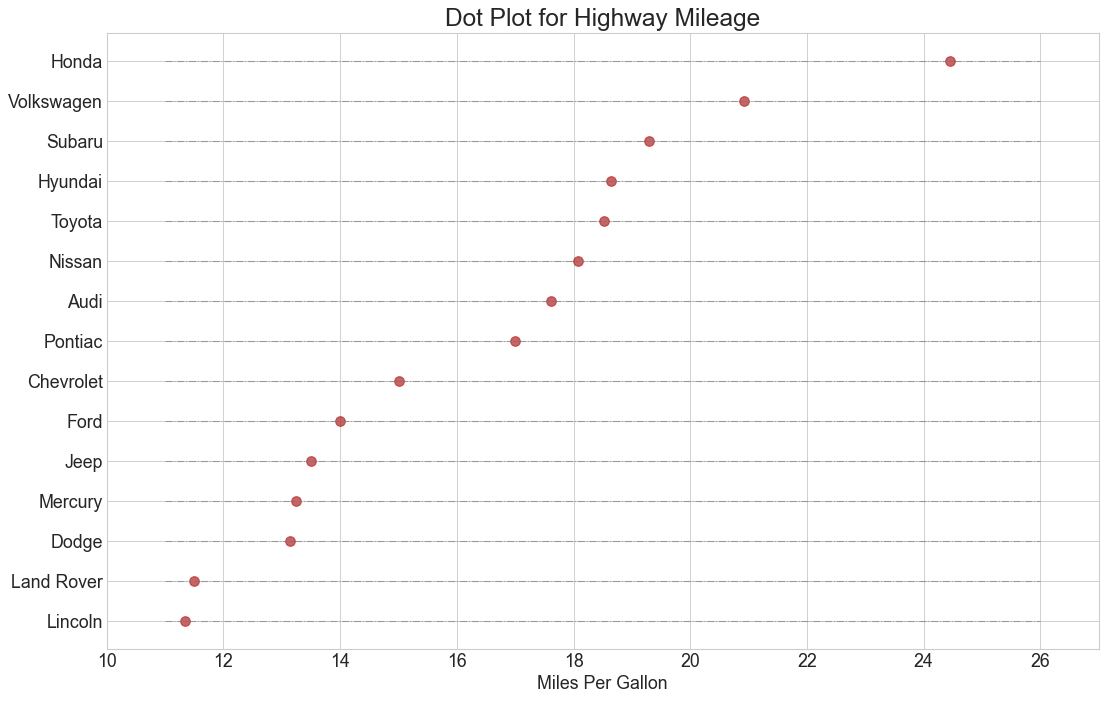

In [11]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating visualizations

# Prepare Data
# Load data from a public URL and select relevant columns
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
# Group data by 'manufacturer' and calculate the average 'cty' mileage
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
# Sort the DataFrame by 'cty' to prepare for plotting
df.sort_values('cty', inplace=True)
# Reset index to use in the plotting as y-axis positions
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16, 10), dpi=80)  # Set size and resolution of the plot
# Draw horizontal lines for reference
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
# Draw scatter plot with custom size and color for dots
ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks, and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})  # Set chart title with font size
ax.set_xlabel('Miles Per Gallon', fontsize=16)  # Set x-axis label
ax.set_yticks(df.index)  # Set custom y-ticks

# Set y-tick labels with manufacturer names and adjust alignment
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)  # Set x-axis limits

# Display the plot
plt.show()

### 2.4 Distribution

### 2.4.1 Histogram for Continuous Variable

A histogram is a graphical representation that organizes a group of data points into user-specified ranges. It effectively displays the frequency distribution of a continuous variable, illustrating how many observations fall into each range or "bin." 

Histograms are invaluable for visualizing and understanding the distribution, skewness, and kurtosis of the data, allowing analysts to quickly assess the central tendency and variability of the data. 

Next, we will create a histogram to explore the distribution of a specific dataset, highlighting its practical application in data analysis.


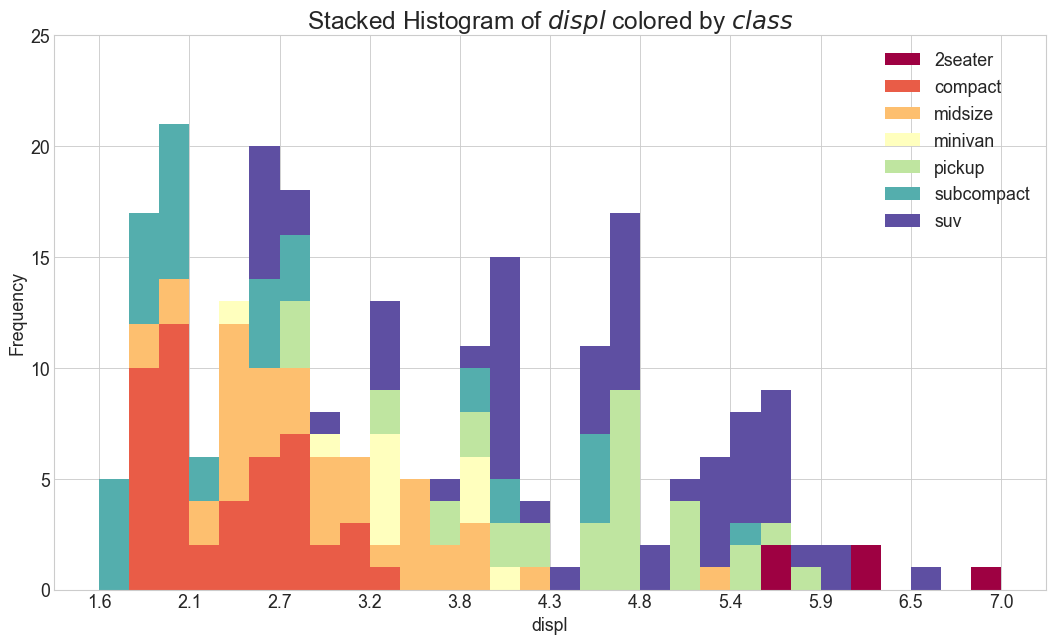

In [12]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations

# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ'  # Define the variable for the x-axis (displacement)
groupby_var = 'class'  # Define the variable to group by (vehicle class)
# Group data by 'class' and select 'displ'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
# Extract values for each group
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=80)  # Set size and resolution of the plot
# Create a color palette
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
# Plot histogram
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
# Create a legend mapping colors to class labels
plt.legend({group: col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)  # Set chart title
plt.xlabel(x_var, fontsize=16)  # Set x-axis label
plt.ylabel("Frequency", fontsize=16)  # Set y-axis label
plt.ylim(0, 25)  # Set limits for the y-axis
# Set custom ticks on the x-axis
plt.xticks(ticks=bins[::3], labels=[round(b, 1) for b in bins[::3]])

# Show the plot
plt.show()

### 2.4.2 Density Plot

A Density Plot is a smoothed version of the histogram and is used to visualize the distribution of continuous variables. It is particularly useful for examining the underlying shape of the data distribution, such as its skewness and peaking. 

By grouping the data by a categorical response variable, density plots can also help in exploring the relationships between variables, revealing how one variable's distribution varies with another.

In this tutorial, we'll use density plots to explore how the distribution of city mileage (`cty`) varies with the number of cylinders (`cyl`) in a vehicle. Let’s dive into creating a density plot that illustrates these dynamics.

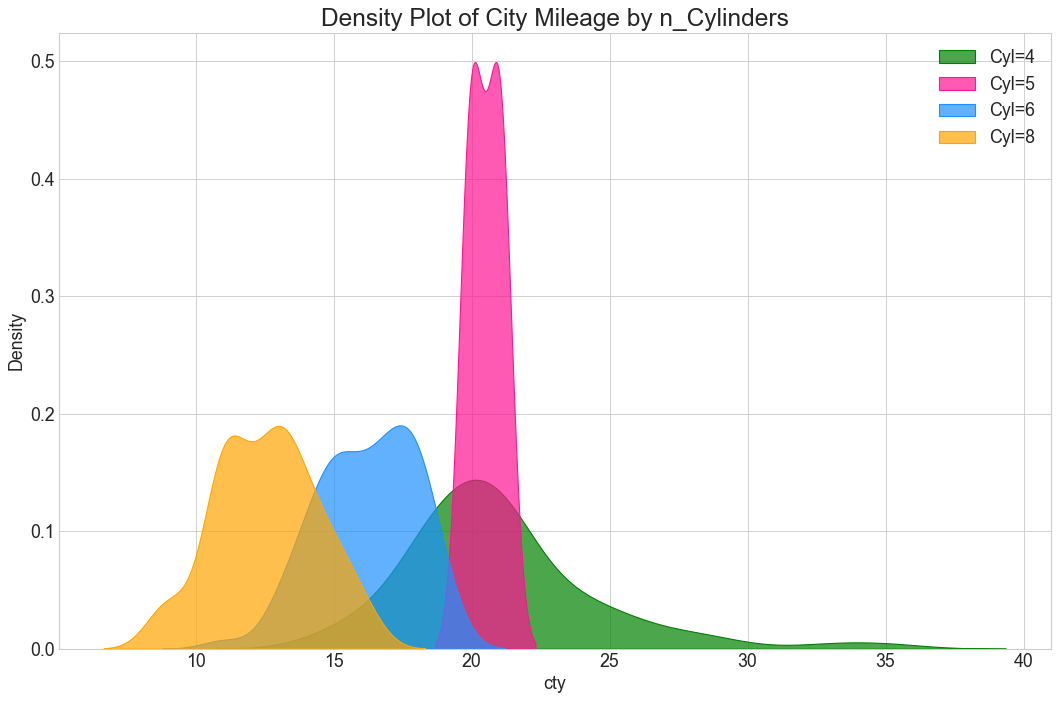

In [13]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For advanced visualization techniques

# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16, 10), dpi=80)  # Set the size and resolution of the plot
# Plot density for cars with 4 cylinders
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], fill=True, color="g", label="Cyl=4", alpha=.7)
# Plot density for cars with 5 cylinders
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], fill=True, color="deeppink", label="Cyl=5", alpha=.7)
# Plot density for cars with 6 cylinders
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], fill=True, color="dodgerblue", label="Cyl=6", alpha=.7)
# Plot density for cars with 8 cylinders
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], fill=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)  # Set chart title with font size
plt.legend()  # Display legend to identify plot lines
plt.show()  # Display the plot

### 2.4.3 Density Curves with Histogram

Combining density curves with histograms allows for a visual analysis that captures both the precise frequency of data points and their overall distribution trends. 

This dual approach helps in understanding the data's structure at a glance, providing insights into patterns and outliers. 

Next, we'll create a visualization that overlays a density curve on a histogram, showcasing how to integrate these two informative views into a single plot.

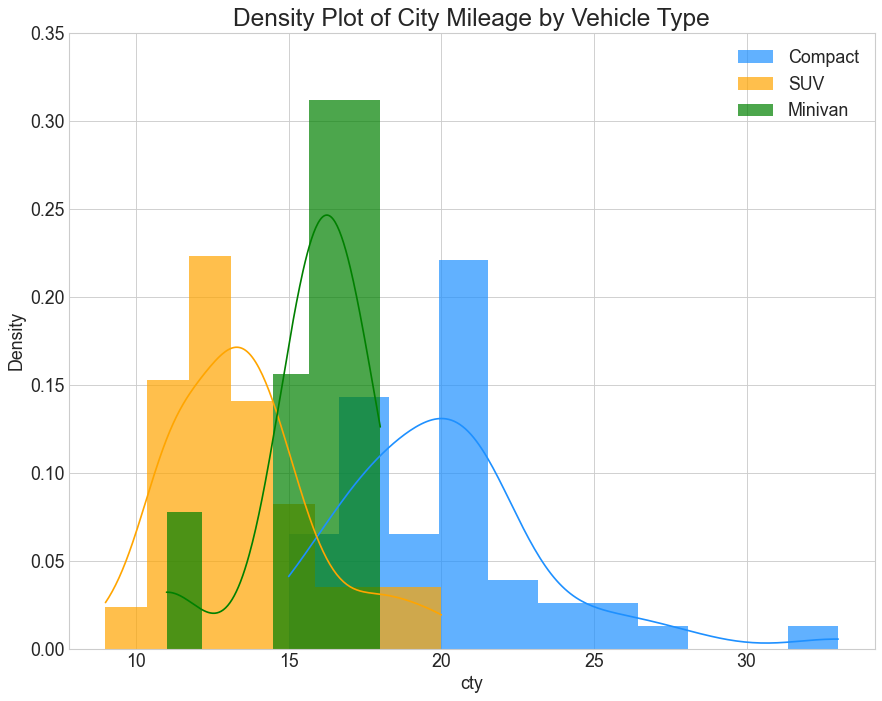

In [14]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For advanced visualization techniques

# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13, 10), dpi=80)  # Set the size and resolution of the plot

# Plot density and histogram for compact cars
sns.histplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact",
             kde=True, element='bars', stat='density', alpha=.7, linewidth=3, edgecolor='none')

# Plot density and histogram for SUVs
sns.histplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV",
             kde=True, element='bars', stat='density', alpha=.7, linewidth=3, edgecolor='none')

# Plot density and histogram for minivans
sns.histplot(df.loc[df['class'] == 'minivan', "cty"], color="green", label="Minivan",
             kde=True, element='bars', stat='density', alpha=.7, linewidth=3, edgecolor='none')


# Decoration
plt.ylim(0, 0.35)  # Set limits for the y-axis
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)  # Set chart title with font size
plt.legend()  # Display legend to identify plot lines

# Show the plot
plt.show()

### 2.4.4 Box Plot

Box plots provide a concise overview of the distribution of data. The visualization represents the minimum, first quartile, median, third quartile, and maximum of a dataset, with potential outliers shown as individual points. 

Box plots are particularly useful for comparing distributions between several groups or across different categories, making them indispensable in exploratory data analysis.

In the upcoming tutorial, we'll learn how to create and interpret box plots using Python's seaborn and matplotlib libraries, demonstrating their practical use in identifying distribution characteristics and outliers in a dataset.


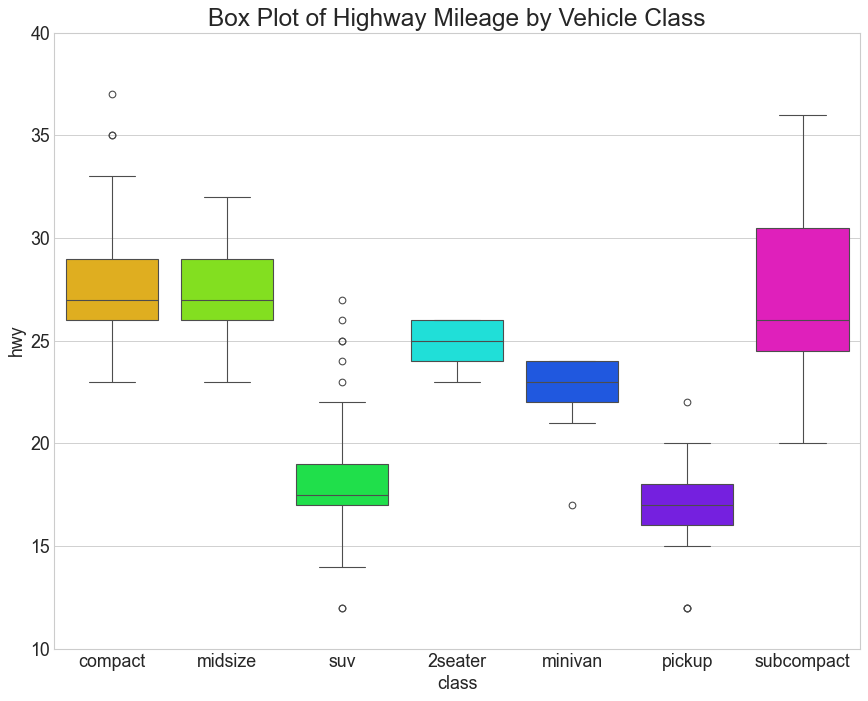

In [15]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For advanced visualization techniques

# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13, 10), dpi=80)  # Set the size and resolution of the plot

# Define a palette to ensure that each class has a different color
palette = sns.color_palette("hsv", n_colors=len(df['class'].unique()))

# Create a boxplot to show highway mileage distributions by vehicle class
sns.boxplot(x='class', y='hwy', hue='class', data=df, notch=False, palette=palette)
# Note: 'notch=False' means the box plot will not display a confidence interval around the median.

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)  # Set chart title with font size
plt.ylim(10, 40)  # Set limits for the y-axis to focus on relevant data range

# Show the plot
plt.show()

## 2.5 Composition

### 2.5.1 Pie Chart

Pie charts visually represent the proportions of different components within a whole, making them straightforward for showing composition. However, their effectiveness can be limited by the difficulty in accurately interpreting the sizes of similar segments. 

To mitigate potential misunderstandings, it is essential to accompany pie charts with clear annotations of percentages or exact values. This practice ensures that the chart conveys precise and comprehensible information.

In our upcoming example, we will include detailed annotations to demonstrate how to use pie charts effectively.

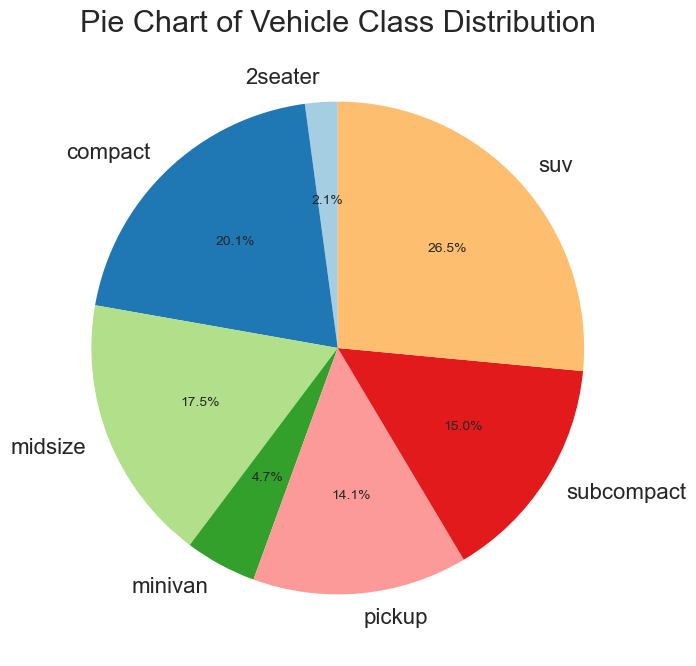

In [16]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating visualizations

# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
# Group data by 'class' and count instances
df = df_raw.groupby('class').size()

# Make the plot with pandas
plt.figure(figsize=(8, 8))  # Set the size of the figure
# Create a pie chart
df.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(np.arange(len(df))))
# Note: 'autopct' automatically adds labels with the percentage format
plt.title("Pie Chart of Vehicle Class Distribution")  # Add a title
plt.ylabel("")  # Remove the y-label as it's not needed in pie charts

# Show the plot
plt.show()

### 2.5.2 Bar Chart

Bar charts are straightforward yet powerful visual tools used to compare quantities across different categories. By displaying data as vertical or horizontal bars, each bar’s length or height directly corresponds to the data values, making comparisons intuitive and immediate. 

Bar charts are particularly useful for highlighting differences in size among various groups or trends over time.

In our next example, we will create a bar chart to visually represent and compare the frequencies of different vehicle classes. This will illustrate how bar charts can effectively convey differences in data, facilitating quick and easy data interpretation.


/var/folders/lp/732_2ppd3f923nnybyb6pz1c0000gp/T/ipykernel_24830/4795942.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment='right')


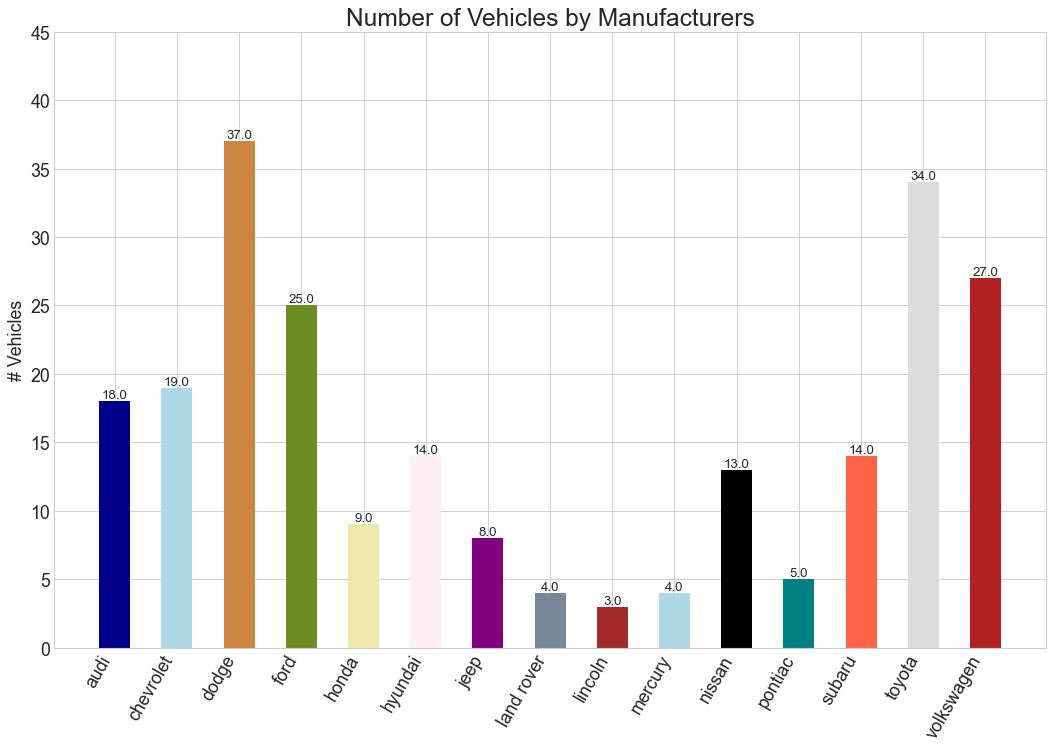

In [17]:
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating visualizations
import random  # For generating random numbers

# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
# Group data by 'manufacturer' and count the number of occurrences
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
# Calculate the number of unique manufacturers plus one for color selection
n = df['manufacturer'].unique().__len__() + 1
# Generate a list of all possible colors
all_colors = list(plt.cm.colors.cnames.keys())
# Set a random seed for reproducibility
random.seed(100)
# Randomly select 'n' colors from the list of all colors
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16, 10), dpi=80)  # Set the size and resolution of the plot
# Create a bar chart
plt.bar(df['manufacturer'], df['counts'], color=c, width=.5)
# Annotate each bar with the count value
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
# Set x-axis labels with a rotation for better readability
plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment='right')
plt.title("Number of Vehicles by Manufacturers", fontsize=22)  # Title of the plot
plt.ylabel('# Vehicles')  # y-axis label
plt.ylim(0, 45)  # Set limits for the y-axis

# Show the plot
plt.show()

# 3. Practice

## 3.1 Jittering with Stripplot

In data visualization, it is common to encounter multiple data points that share the same X and Y values. When plotted, these points can overlap, making it difficult to distinguish between them visually. 

To resolve this issue, we apply a technique called "jittering," which slightly adjusts the positions of the data points to prevent overlap and enhance visibility.

#### Task:
Use seaborn's `stripplot()` function to create a jittered plot of the dataset. Focus on exploring the relationship between the attributes 'cty' (city mileage) and 'hwy' (highway mileage). 

Your plot should help visually differentiate individual points even if they have the same values.

#### Objectives:
1. Implement jittering to avoid overlapping of data points.

2. Investigate and visualize the relationship between city mileage (`cty`) and highway mileage (`hwy`).

This practice will not only enhance your understanding of how to work with overlapping data points but also improve your skills in using seaborn for data visualization.


In [18]:
# Data Source
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Stripplot
# Insert your code





## 3.2 Dot + Box Plot

The combination of dot and box plots provides a comprehensive view of data distribution, combining the benefits of box plots and scatter plots. 

This method is effective for visualizing the spread and central tendency of data, as well as the density of data points within each category.

#### Task:
Create a Dot + Box Plot to analyze the highway mileage (`hwy`) across different vehicle classes, grouped by the number of cylinders (`cyl`). 

The box plot should provide a summary of the mileage distribution, while the overlaid dot plot will show individual data points to indicate the count of vehicles in each group.

#### Objectives:
1. Draw a box plot to summarize the distribution of highway mileage (`hwy`) for different vehicle classes.

2. Overlay a dot plot on the same graph to show the actual highway mileage data points for each class, providing insight into the data density and distribution.

3. Group the data by both vehicle class and cylinder count to examine how these factors influence highway mileage.

This practice will enhance your ability to create detailed visualizations that reveal underlying patterns and distributions in the data.


In [19]:
# Data Source
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
# Insert your code



